In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cvxpy as cp

sns.set()

## First, Load the Data

In [2]:
path_to_prices = r'C:\Users\Rafay\Documents\thesis\ActualWork\Data\results\prices.csv'
path_to_factors = r'C:\Users\Rafay\Documents\thesis\ActualWork\Data\results\3factors.csv'
prices = pd.read_csv(path_to_prices)
factors = pd.read_csv(path_to_factors)
assets_list = list(prices['symbol'].unique())
prices.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adjclose,splits,dividends
0,0,AMZN,2006-01-03,2.3735,2.3925,2.3125,2.3790,151644000,2.3790,0.0,0.0
1,1,AMZN,2006-01-04,2.3745,2.3865,2.3345,2.3625,148818000,2.3625,0.0,0.0
2,2,AMZN,2006-01-05,2.3580,2.4100,2.3555,2.3825,108344000,2.3825,0.0,0.0
3,3,AMZN,2006-01-06,2.3985,2.4290,2.3660,2.3935,123058000,2.3935,0.0,0.0
4,4,AMZN,2006-01-09,2.3275,2.3550,2.3200,2.3540,178862000,2.3540,0.0,0.0


In [3]:
pivot_prices = np.round(pd.pivot_table(prices, values='close', 
                                index='date', 
                                columns='symbol', 
                                aggfunc=np.mean),2)
pivot_prices = pivot_prices.reset_index()
pivot_prices['date'] = pd.to_datetime(pivot_prices['date'])
factors['date'] = pd.to_datetime(factors['Date'], format="%Y%m%d")

pivot_prices.head()

symbol,date,A,AAPL,ABB,ABT,ACN,ADBE,ADI,ADP,ADSK,...,WELL,WFC,WM,WMB,WPC,WTRG,WY,XEL,XOM,YUM
0,2006-01-03,23.96,2.67,10.19,18.98,29.30,38.52,36.70,36.74,42.75,...,34.55,31.90,30.67,19.48,25.74,22.05,66.64,18.57,58.47,16.80
1,2006-01-04,24.03,2.68,10.48,19.00,29.46,38.42,37.04,36.86,42.52,...,34.92,31.53,30.27,19.61,26.14,22.15,68.25,18.66,58.57,16.95
2,2006-01-05,24.66,2.66,10.55,19.25,29.68,38.07,38.22,36.55,41.87,...,35.64,31.50,30.39,19.40,27.20,22.31,67.65,18.65,58.28,17.67
3,2006-01-06,24.79,2.72,10.64,19.62,31.15,39.00,38.37,36.87,44.29,...,35.79,31.68,30.54,19.48,26.62,22.44,67.75,18.72,59.43,17.62
4,2006-01-09,24.71,2.72,10.95,20.35,31.06,38.38,38.91,36.77,43.64,...,36.30,31.67,31.04,19.79,27.00,22.50,67.59,18.67,59.40,17.76


In [4]:
pivot_prices = pivot_prices.set_index('date')
returns = pivot_prices.pct_change()
pivot_prices = pivot_prices.reset_index()
returns = returns.reset_index()
returns = returns.merge(factors, on='date', how='left')
returns = returns.drop(['Date'], axis=1)
returns = returns.dropna()
returns.describe()

,A,AAPL,ABB,ABT,ACN,ADBE,ADI,ADP,ADSK,AEE,...,WPC,WTRG,WY,XEL,XOM,YUM,Mkt-RF,SMB,HML,RF
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,...,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000
mean,0.000617,0.001254,0.000483,0.000558,0.000711,0.000904,0.000556,0.000519,0.000814,0.000212,...,0.000423,0.000321,0.000162,0.000415,0.000049,0.000648,0.030220,-0.005257,-0.011089,0.004483
std,0.019759,0.020795,0.020749,0.013860,0.016458,0.021275,0.019470,0.014627,0.024392,0.014647,...,0.017828,0.015733,0.024531,0.012631,0.016720,0.017376,1.051192,0.425688,0.414513,0.007001
min,-0.110117,-0.179039,-0.176218,-0.097857,-0.134543,-0.190346,-0.166149,-0.152526,-0.158599,-0.173750,...,-0.177856,-0.129066,-0.618934,-0.126918,-0.139525,-0.188261,-9.610000,-5.390000,-3.110000,0.000000
25%,-0.008193,-0.008296,-0.008518,-0.006159,-0.006860,-0.008508,-0.008628,-0.005821,-0.011073,-0.006411,...,-0.006701,-0.007085,-0.009605,-0.005654,-0.007461,-0.007099,-0.380000,-0.210000,-0.210000,0.000000
50%,0.000953,0.000809,0.000895,0.000395,0.000966,0.001173,0.000623,0.000764,0.001043,0.000582,...,0.000487,0.000767,0.000593,0.000557,0.000000,0.000632,0.080000,0.010000,-0.020000,0.000000
75%,0.010247,0.011663,0.010005,0.007652,0.008430,0.010885,0.009898,0.007501,0.012529,0.007422,...,0.007561,0.007984,0.010542,0.006963,0.007675,0.008395,0.510000,0.210000,0.180000,0.010000
max,0.138682,0.138728,0.219495,0.109360,0.163668,0.177193,0.156463,0.118576,0.161985,0.178014,...,0.206257,0.196295,0.253155,0.112577,0.171905,0.232484,9.200000,2.360000,4.160000,0.020000


In [6]:
'''
Inputs: AssetReturns: Pandas DataFrame, each date is a row, one column for each asset
        FactorReturn: Pandas DataFrame, each date is a row, one column for each factor
        Technique: Method through which parameters will be estimated. Default: OLS
Outputs: mu: numpy array, key: Symbol. value: return estimate
         Q: nxn Asset Covariance Matrix (n: # of assets)
'''
def GetParameterEstimates(AssetReturns, FactorReturns, technique='OLS', log=True):
    # Only have OLS implemented so far
    if technique!='OLS':
        return [], []
    
    AssetReturns_np = AssetReturns.to_numpy()
    FactorReturns_np = FactorReturns.to_numpy()
    T,n = AssetReturns_np.shape
    _, p = FactorReturns.shape

    # Get Data Matrix - Factors
    X = np.zeros((T, p+1))
    X[:,:-1] = np.ones((T,1)) # Add ones to first row
    X[:,1:] = FactorReturns

    # Get regression coefficients for Assets
    # B = (X^TX)^(-1)X^Ty
    B = np.matmul(np.linalg.inv((np.matmul(np.transpose(X), X))), (np.matmul(np.transpose(X), AssetReturns_np)))

    # Get alpha and betas
    a = np.transpose(B[0,:])
    V = B[1:(p+1),:]

    # Residual Variance to get D
    ep = AssetReturns_np - np.matmul(X, B)
    sigma_ep = 1/(T-p-1) * np.sum(np.square(ep), axis=0)
    D = np.diag(sigma_ep)

    # Get Factor Estimated Return and Covariance Matrix
    f_bar = np.transpose(np.mean(FactorReturns_np, axis=0))
    F = np.cov(FactorReturns_np, rowvar=False)

    # Get mu
    mu = a + np.matmul(np.transpose(V), f_bar)

    # Get Q
    Q = np.matmul(np.matmul(np.transpose(V), F), V) + D

    # Make sure Q is PSD
    w,v = np.linalg.eig(Q)
    min_eig = np.min(w)


    if min_eig<0:
        Q -= min_eig*np.identity(n)

    print(Q)
    
    if log:
        print("Shape of X: {}".format(X.shape))
        print("Shape of B: {}".format(B.shape))
        print("Shape of X*B: {}".format(np.matmul(X, B).shape))
        print("Shape of ep: {}".format(ep.shape))
        print("Shape of sigma_ep: {}".format(sigma_ep.shape))
        print("Shape of D: {}".format(sigma_ep.shape))
        print("Shape of Q: {}".format(Q.shape))
    
    return mu, Q


TypeError: GetParameterEstimates() missing 2 required positional arguments: 'AssetReturns' and 'FactorReturns'

In [7]:
'''
Mean Variance Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations
'''

def MVO(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)
    
    # Target Return for Constraint
    targetRet = np.mean(mu)
    
    constraints = [
        cp.sum(w) == 1, # Sum to 1
        mu.T @ w >= targetRet, # Target Return Constraint
        w>=0 # Disallow Short Sales
    ]

    # Objective Function
    risk = cp.quad_form(w, Q)

    prob = cp.Problem(cp.Minimize(risk), constraints=constraints)
    prob.solve()
    return w.value

'''
Risk Parity Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations
'''

def RP(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)

    # Kappa
    k = 2
          
    constraints = [
        w>=0 # Disallow Short Sales
    ]

    # Objective Function
    risk = cp.quad_form(w, Q)
    log_term = 0
    for i in range(n):
        log_term += cp.log(w[i])
    
    prob = cp.Problem(cp.Minimize(risk-(k*log_term)), constraints=constraints)
    
    # ECOS fails sometimes, if it does then do SCS
    try:
        prob.solve(verbose=False)
    except:
        prob.solve(solver='SCS',verbose=False)
    x = w.value
    x = np.divide(x, np.sum(x))
    return x


'''
Distributionally Robust Risk Parity With Wasserstein Distance Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations

Formula:
    \min_{\boldsymbol{\phi} \in \mathcal{X}} {(\sqrt{\boldsymbol{\phi}^T \Sigma_{\mathcal{P}}(R)\boldsymbol{\phi}} + \sqrt{\delta}||\boldsymbol{\phi}||_p)^2} - c\sum_{i=1}^n ln(y)

'''
import math
def DRRPW(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)

    # Kappa
    k = 2

    # Size of uncertainty set
    delta = 0.05

    # Norm for x
    p = 2

    constraints = [
        w>=0 # Disallow Short Sales
    ]

    # risk = cp.quad_form(w, Q)

    log_term = 0
    for i in range(n):
        log_term += cp.log(w[i])
    
    # We need to compute \sqrt{x^T Q x} intelligently because
    # cvxpy does not compute well with the \sqrt

    # To do this, I will take the Cholesky decomposition
    # Q = LL^T
    # Then, take the 2-norm of L*x

    # Idea: (L_1 * x_1)^2 = Q_1 x_1

    L = np.linalg.cholesky(Q)

    obj = cp.power(cp.norm(L@w,2) + math.sqrt(delta)*cp.norm(w, p),2)
    obj = obj - k*log_term

    prob = cp.Problem(cp.Minimize(obj), constraints=constraints)
    
    # ECOS fails sometimes, if it does then do SCS
    try:
        prob.solve(verbose=False)
    except:
        prob.solve(solver='SCS',verbose=False)
    
    x = w.value
    x = np.divide(x, np.sum(x))
    
    # Check Risk Parity Condition is actually met
    risk_contrib = np.multiply(x, Q.dot(x))
    print(risk_contrib)
    print("DRRPW Worked? {}".format(np.all(np.isclose(risk_contrib, risk_contrib[0]))))

    return x


In [8]:
from datetime import datetime

def generate_date_list(data, start, end):
    start = datetime.fromisoformat(start)
    end = datetime.fromisoformat(end)

    # Train model from start_date to date
    mask = (data['date'] >= start) & (data['date'] <= end)
    data = data.loc[mask]
    return data.date.apply(lambda x: x.date()).unique().tolist()

In [9]:
from enum import Enum
class Optimizers(Enum):
    MVO = 1
    RP = 2
    DRRPW = 3
    
def GetOptimalAllocation(mu, Q, technique=Optimizers.MVO):
    if technique == Optimizers.MVO:
        return MVO(mu,Q)
    if technique == Optimizers.RP:
        return RP(mu, Q)
    if technique == Optimizers.DRRPW:
        return DRRPW(mu, Q)
    


In [20]:
portVal

,date,Wealth
0,2007-01-03,1.000000e+06
1,2007-01-04,4.456809e+09
2,2007-01-05,2.102627e+13
3,2007-01-08,1.013757e+17
4,2007-01-09,4.511221e+20
...,...,...
246,2007-12-24,inf
247,2007-12-26,inf
248,2007-12-27,inf
249,2007-12-28,inf


In [21]:
from tqdm import tqdm
from functools import partial
tqdm = partial(tqdm, position=0, leave=True)

date = '2017-06-12'
assets_list_cleaned = [x for x in assets_list if str(x) != 'nan']
holdings = pd.DataFrame(columns=['date']+assets_list_cleaned)
portVal = pd.DataFrame(columns=['date', 'Wealth'])
factors = ['Mkt-RF', 'SMB', 'HML']
InitialValue = 1000000 # $1,000,000
lookback = 30 # Number of days preceeding current date to train
RP
# opt_type = Optimizers.DRRPW
opt_type = Optimizers.RP

dates = generate_date_list(returns, start='2007-01-01', end='2007-01-31')
first = True
for date in tqdm(dates):
    # Get Asset Prices for Today
    currentPrices = (pivot_prices[pivot_prices['date']==str(date)]
        .drop('date',axis=1)
        .values
        .flatten())
    
    # Update Portfolio Value
    if first:
        portVal.loc[len(portVal)] = [date] + [InitialValue]
        CurrentPortfolioValue = InitialValue
        first = False
    else:     
        CurrentPortfolioValue = np.dot(currentPrices,noShares)
        portVal.loc[len(portVal)] = [date] + [CurrentPortfolioValue]
        
    # We don't want the current date information, hence the lack of equality
    # Get last 30
    date = str(date)
    
    returns_lastn = returns[(returns['date'] < date)].tail(lookback)
    factor_returns = returns_lastn[factors]
    asset_returns = returns_lastn.drop(factors + ['date', 'RF'], axis=1)

    mu, Q = GetParameterEstimates(asset_returns, factor_returns, log=False)
    
    x = GetOptimalAllocation(mu, Q, opt_type)

    # Update Holdings
    holdings.loc[len(holdings)] = [date] + list(x)

    # Update shares held
    # 50% of 100k = 50k. If price is 100 we have 50,000/100=50 shares
    noShares = np.divide(x*CurrentPortfolioValue, currentPrices)
    print('Done {}'.format(date))
portVal['date'] = pd.to_datetime(portVal['date'])
portVal.merge(returns[['date','RF']], how='left', on='date')
# drrpw=portVal
rp=portVal


  0%|          | 0/20 [00:00<?, ?it/s]

[[1.31563924e-04 4.78923376e-06 3.36168943e-05 ... 1.72207348e-05
  2.24191911e-05 2.68483760e-05]
 [4.78923376e-06 3.85101982e-04 2.40320162e-05 ... 2.00440514e-06
  1.09435614e-05 3.71502250e-05]
 [3.36168943e-05 2.40320162e-05 1.39812229e-04 ... 2.69702181e-05
  4.42076950e-05 4.98815308e-05]
 ...
 [1.72207348e-05 2.00440514e-06 2.69702181e-05 ... 3.35858421e-05
  1.93967023e-05 1.94395908e-05]
 [2.24191911e-05 1.09435614e-05 4.42076950e-05 ... 1.93967023e-05
  2.09528724e-04 3.25638684e-05]
 [2.68483760e-05 3.71502250e-05 4.98815308e-05 ... 1.94395908e-05
  3.25638684e-05 1.89101937e-04]]


  5%|▌         | 1/20 [00:00<00:18,  1.01it/s]

Done 2007-01-03
[[ 1.34602772e-04  6.83311890e-06  4.07130779e-05 ...  1.64788052e-05
   3.26751517e-05  2.87602121e-05]
 [ 6.83311890e-06  3.76470952e-04  3.13491750e-05 ... -2.08396111e-06
   2.72663286e-05  3.47070194e-05]
 [ 4.07130779e-05  3.13491750e-05  1.42912596e-04 ...  2.19747298e-05
   5.55848433e-05  5.04630097e-05]
 ...
 [ 1.64788052e-05 -2.08396111e-06  2.19747298e-05 ...  4.00724173e-05
   1.76167280e-05  1.38424329e-05]
 [ 3.26751517e-05  2.72663286e-05  5.55848433e-05 ...  1.76167280e-05
   2.18669458e-04  4.16125315e-05]
 [ 2.87602121e-05  3.47070194e-05  5.04630097e-05 ...  1.38424329e-05
   4.16125315e-05  1.82993370e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 10%|█         | 2/20 [00:01<00:17,  1.04it/s]

Done 2007-01-04
[[ 1.34699819e-04  6.52758946e-06  4.40047093e-05 ...  1.58373360e-05
   3.44966712e-05  2.89767218e-05]
 [ 6.52758946e-06  3.95675063e-04  1.42540173e-05 ... -2.99990702e-06
   2.11447882e-05  3.26721432e-05]
 [ 4.40047093e-05  1.42540173e-05  1.83569319e-04 ...  2.62674560e-05
   6.35693875e-05  4.86561193e-05]
 ...
 [ 1.58373360e-05 -2.99990702e-06  2.62674560e-05 ...  3.94909039e-05
   2.00203732e-05  1.43959999e-05]
 [ 3.44966712e-05  2.11447882e-05  6.35693875e-05 ...  2.00203732e-05
   2.30851098e-04  4.16649718e-05]
 [ 2.89767218e-05  3.26721432e-05  4.86561193e-05 ...  1.43959999e-05
   4.16649718e-05  1.78322474e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 15%|█▌        | 3/20 [00:02<00:15,  1.12it/s]

Done 2007-01-05
[[ 1.38011136e-04  6.97781100e-06  5.02526627e-05 ...  2.25352538e-05
   3.31456593e-05  2.97917964e-05]
 [ 6.97781100e-06  3.95038324e-04  2.28921043e-05 ... -2.41403294e-06
   2.53056773e-05  4.07495545e-05]
 [ 5.02526627e-05  2.28921043e-05  1.97813283e-04 ...  4.13697252e-05
   5.84018449e-05  5.73812525e-05]
 ...
 [ 2.25352538e-05 -2.41403294e-06  4.13697252e-05 ...  5.51667198e-05
   2.33405748e-05  2.04321246e-05]
 [ 3.31456593e-05  2.53056773e-05  5.84018449e-05 ...  2.33405748e-05
   2.31098445e-04  3.92964580e-05]
 [ 2.97917964e-05  4.07495545e-05  5.73812525e-05 ...  2.04321246e-05
   3.92964580e-05  1.71559941e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 20%|██        | 4/20 [00:03<00:14,  1.13it/s]

Done 2007-01-08
[[ 1.38079739e-04  6.99137795e-06  5.13153490e-05 ...  2.22014737e-05
   3.18913701e-05  3.05661324e-05]
 [ 6.99137795e-06  3.75837191e-04  1.83551601e-05 ... -3.03061177e-06
   2.17645230e-05  3.75752371e-05]
 [ 5.13153490e-05  1.83551601e-05  2.04250924e-04 ...  4.17134805e-05
   5.62014024e-05  5.72811997e-05]
 ...
 [ 2.22014737e-05 -3.03061177e-06  4.17134805e-05 ...  5.50311393e-05
   2.20878014e-05  2.01999780e-05]
 [ 3.18913701e-05  2.17645230e-05  5.62014024e-05 ...  2.20878014e-05
   2.27441626e-04  3.75431476e-05]
 [ 3.05661324e-05  3.75752371e-05  5.72811997e-05 ...  2.01999780e-05
   3.75431476e-05  1.71392546e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 25%|██▌       | 5/20 [00:04<00:13,  1.07it/s]

Done 2007-01-09
[[ 1.35975528e-04  1.72157682e-05  5.32776790e-05 ...  2.29353026e-05
   3.84753968e-05  3.46637995e-05]
 [ 1.72157682e-05  6.34324905e-04  4.79724875e-06 ... -3.08366245e-06
   3.59221315e-05  3.23186786e-05]
 [ 5.32776790e-05  4.79724875e-06  2.00398622e-04 ...  4.24322458e-05
   5.75048011e-05  5.08067081e-05]
 ...
 [ 2.29353026e-05 -3.08366245e-06  4.24322458e-05 ...  5.49159712e-05
   2.38951759e-05  2.10604807e-05]
 [ 3.84753968e-05  3.59221315e-05  5.75048011e-05 ...  2.38951759e-05
   2.26716015e-04  4.17150507e-05]
 [ 3.46637995e-05  3.23186786e-05  5.08067081e-05 ...  2.10604807e-05
   4.17150507e-05  1.66011057e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 30%|███       | 6/20 [00:05<00:12,  1.08it/s]

Done 2007-01-10
[[ 1.38334583e-04  4.21700452e-06  5.57301181e-05 ...  2.45940942e-05
   3.92550820e-05  3.19905255e-05]
 [ 4.21700452e-06  6.96789946e-04  7.67054013e-07 ... -1.28290436e-06
   2.20250790e-05  4.70702234e-05]
 [ 5.57301181e-05  7.67054013e-07  1.98955983e-04 ...  3.73057378e-05
   6.27905814e-05  4.65467500e-05]
 ...
 [ 2.45940942e-05 -1.28290436e-06  3.73057378e-05 ...  5.61163629e-05
   2.62028161e-05  1.94760090e-05]
 [ 3.92550820e-05  2.20250790e-05  6.27905814e-05 ...  2.62028161e-05
   2.33241694e-04  3.96515299e-05]
 [ 3.19905255e-05  4.70702234e-05  4.65467500e-05 ...  1.94760090e-05
   3.96515299e-05  1.70628671e-04]]


 35%|███▌      | 7/20 [00:06<00:11,  1.10it/s]

Done 2007-01-11
[[ 1.08640612e-04 -2.06361478e-05  2.94752570e-05 ...  1.33856179e-05
   2.59087458e-05  1.06001862e-05]
 [-2.06361478e-05  6.87366773e-04 -3.03046612e-05 ... -1.54074658e-05
  -1.84937731e-06  2.80702387e-05]
 [ 2.94752570e-05 -3.03046612e-05  1.75629108e-04 ...  2.59198235e-05
   5.50879783e-05  2.28879362e-05]
 ...
 [ 1.33856179e-05 -1.54074658e-05  2.59198235e-05 ...  5.29880667e-05
   2.28712423e-05  9.04337510e-06]
 [ 2.59087458e-05 -1.84937731e-06  5.50879783e-05 ...  2.28712423e-05
   2.32100290e-04  3.20253317e-05]
 [ 1.06001862e-05  2.80702387e-05  2.28879362e-05 ...  9.04337510e-06
   3.20253317e-05  1.46009113e-04]]


 40%|████      | 8/20 [00:07<00:11,  1.07it/s]

Done 2007-01-12
[[ 1.09406469e-04 -2.12961502e-05  2.85684163e-05 ...  1.19288683e-05
   2.51439028e-05  9.43900224e-06]
 [-2.12961502e-05  6.75509174e-04 -3.47207706e-05 ... -1.95469973e-05
  -1.69856304e-05  1.78309867e-05]
 [ 2.85684163e-05 -3.47207706e-05  2.00409036e-04 ...  2.34910802e-05
   7.23637060e-05  2.54543897e-05]
 ...
 [ 1.19288683e-05 -1.95469973e-05  2.34910802e-05 ...  5.43931011e-05
   2.00223440e-05  5.55767549e-06]
 [ 2.51439028e-05 -1.69856304e-05  7.23637060e-05 ...  2.00223440e-05
   2.31354186e-04  2.90542813e-05]
 [ 9.43900224e-06  1.78309867e-05  2.54543897e-05 ...  5.55767549e-06
   2.90542813e-05  1.37738508e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 45%|████▌     | 9/20 [00:08<00:10,  1.06it/s]

Done 2007-01-16
[[ 9.48881248e-05 -2.70303232e-05  3.86278519e-05 ...  1.22990262e-05
   3.50332749e-05  1.80431659e-05]
 [-2.70303232e-05  6.97707894e-04 -4.18252578e-05 ... -1.86068595e-05
  -2.21425280e-05  1.89526748e-05]
 [ 3.86278519e-05 -4.18252578e-05  1.82172585e-04 ...  1.62824568e-05
   5.47566205e-05  2.20615891e-05]
 ...
 [ 1.22990262e-05 -1.86068595e-05  1.62824568e-05 ...  5.33033841e-05
   1.32432497e-05  3.69959023e-06]
 [ 3.50332749e-05 -2.21425280e-05  5.47566205e-05 ...  1.32432497e-05
   2.12904119e-04  2.64954313e-05]
 [ 1.80431659e-05  1.89526748e-05  2.20615891e-05 ...  3.69959023e-06
   2.64954313e-05  1.38640622e-04]]


 50%|█████     | 10/20 [00:09<00:09,  1.10it/s]

Done 2007-01-17
[[ 1.10208873e-04 -3.23823201e-05  3.99647875e-05 ...  1.31835020e-05
   3.57013686e-05  1.58525347e-05]
 [-3.23823201e-05  7.22491434e-04 -3.75740876e-05 ... -1.68067091e-05
  -1.82425322e-05  1.37595213e-05]
 [ 3.99647875e-05 -3.75740876e-05  1.87548185e-04 ...  1.41852397e-05
   5.30555377e-05  2.53740552e-05]
 ...
 [ 1.31835020e-05 -1.68067091e-05  1.41852397e-05 ...  5.25121707e-05
   1.21346529e-05  3.82744445e-06]
 [ 3.57013686e-05 -1.82425322e-05  5.30555377e-05 ...  1.21346529e-05
   2.14514140e-04  2.85787461e-05]
 [ 1.58525347e-05  1.37595213e-05  2.53740552e-05 ...  3.82744445e-06
   2.85787461e-05  1.38431167e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 55%|█████▌    | 11/20 [00:10<00:07,  1.13it/s]

Done 2007-01-18
[[ 1.24024479e-04 -3.02253937e-05  4.22534973e-05 ...  1.32376722e-05
   3.93775274e-05  1.77000064e-05]
 [-3.02253937e-05  8.70759735e-04 -3.01120837e-05 ... -1.59209835e-05
  -1.29125591e-05  2.05635159e-05]
 [ 4.22534973e-05 -3.01120837e-05  1.87551571e-04 ...  1.49746078e-05
   5.33956006e-05  2.63825831e-05]
 ...
 [ 1.32376722e-05 -1.59209835e-05  1.49746078e-05 ...  5.37988068e-05
   1.31742592e-05  4.29779526e-06]
 [ 3.93775274e-05 -1.29125591e-05  5.33956006e-05 ...  1.31742592e-05
   2.13250348e-04  2.99218252e-05]
 [ 1.77000064e-05  2.05635159e-05  2.63825831e-05 ...  4.29779526e-06
   2.99218252e-05  1.42809139e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 60%|██████    | 12/20 [00:10<00:06,  1.14it/s]

Done 2007-01-19
[[ 1.20116086e-04 -3.13813202e-05  3.73109892e-05 ...  1.15418384e-05
   3.65962399e-05  1.25273127e-05]
 [-3.13813202e-05  8.71701321e-04 -3.03918590e-05 ... -1.64273512e-05
  -1.13700525e-05  1.98342492e-05]
 [ 3.73109892e-05 -3.03918590e-05  2.04550283e-04 ...  1.31277287e-05
   5.35848623e-05  2.01256845e-05]
 ...
 [ 1.15418384e-05 -1.64273512e-05  1.31277287e-05 ...  5.29414754e-05
   1.17685086e-05  2.52950905e-06]
 [ 3.65962399e-05 -1.13700525e-05  5.35848623e-05 ...  1.17685086e-05
   2.30887598e-04  2.77408379e-05]
 [ 1.25273127e-05  1.98342492e-05  2.01256845e-05 ...  2.52950905e-06
   2.77408379e-05  1.37808793e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 65%|██████▌   | 13/20 [00:11<00:06,  1.07it/s]

Done 2007-01-22
[[ 1.11464247e-04 -2.54285379e-05  3.30997370e-05 ...  1.02944352e-05
   3.50147856e-05  6.17204844e-06]
 [-2.54285379e-05  8.81921904e-04 -2.56136078e-05 ... -1.78383562e-05
  -7.48363048e-06  3.16108440e-05]
 [ 3.30997370e-05 -2.56136078e-05  1.97856421e-04 ...  1.19189785e-05
   5.15920519e-05  1.49547916e-05]
 ...
 [ 1.02944352e-05 -1.78383562e-05  1.19189785e-05 ...  5.29436545e-05
   1.13766425e-05 -1.00585420e-06]
 [ 3.50147856e-05 -7.48363048e-06  5.15920519e-05 ...  1.13766425e-05
   2.31276072e-04  2.16815293e-05]
 [ 6.17204844e-06  3.16108440e-05  1.49547916e-05 ... -1.00585420e-06
   2.16815293e-05  1.06918847e-04]]


 70%|███████   | 14/20 [00:12<00:05,  1.09it/s]

Done 2007-01-23
[[ 1.12079395e-04 -2.74813188e-05  3.55340230e-05 ...  1.02086262e-05
   3.76157163e-05  6.49948930e-06]
 [-2.74813188e-05  8.79077846e-04 -3.07627185e-05 ... -1.82104674e-05
  -1.40733554e-05  3.02836125e-05]
 [ 3.55340230e-05 -3.07627185e-05  2.07167441e-04 ...  1.22962531e-05
   5.99640126e-05  1.67293196e-05]
 ...
 [ 1.02086262e-05 -1.82104674e-05  1.22962531e-05 ...  5.22132883e-05
   1.17890272e-05 -1.01459687e-06]
 [ 3.76157163e-05 -1.40733554e-05  5.99640126e-05 ...  1.17890272e-05
   2.34169673e-04  2.35248090e-05]
 [ 6.49948930e-06  3.02836125e-05  1.67293196e-05 ... -1.01459687e-06
   2.35248090e-05  1.00814808e-04]]


 75%|███████▌  | 15/20 [00:13<00:04,  1.12it/s]

Done 2007-01-24
[[ 1.11974857e-04 -2.08205672e-05  3.32814045e-05 ...  1.25759553e-05
   3.51168535e-05  7.87098519e-06]
 [-2.08205672e-05  8.51010200e-04 -2.45833973e-05 ... -1.68695051e-05
  -8.18884461e-06  2.87511700e-05]
 [ 3.32814045e-05 -2.45833973e-05  2.04642896e-04 ...  1.61255015e-05
   6.04503019e-05  1.88577162e-05]
 ...
 [ 1.25759553e-05 -1.68695051e-05  1.61255015e-05 ...  5.93330853e-05
   1.67772509e-05  1.16494593e-06]
 [ 3.51168535e-05 -8.18884461e-06  6.04503019e-05 ...  1.67772509e-05
   2.33415834e-04  2.53814409e-05]
 [ 7.87098519e-06  2.87511700e-05  1.88577162e-05 ...  1.16494593e-06
   2.53814409e-05  8.98207556e-05]]


 80%|████████  | 16/20 [00:14<00:03,  1.14it/s]

Done 2007-01-25
[[ 1.18706017e-04 -2.33230763e-05  4.59204455e-05 ...  1.55049287e-05
   4.69286538e-05  6.82935235e-06]
 [-2.33230763e-05  8.48116244e-04 -2.12772558e-05 ... -1.27816731e-05
  -4.39466323e-06  3.59591987e-05]
 [ 4.59204455e-05 -2.12772558e-05  2.14041722e-04 ...  1.81446048e-05
   7.18041916e-05  1.64094995e-05]
 ...
 [ 1.55049287e-05 -1.27816731e-05  1.81446048e-05 ...  5.92781877e-05
   1.91101047e-05  1.34776412e-06]
 [ 4.69286538e-05 -4.39466323e-06  7.18041916e-05 ...  1.91101047e-05
   2.44259903e-04  2.48932776e-05]
 [ 6.82935235e-06  3.59591987e-05  1.64094995e-05 ...  1.34776412e-06
   2.48932776e-05  7.34248986e-05]]


 85%|████████▌ | 17/20 [00:15<00:02,  1.13it/s]

Done 2007-01-26
[[ 1.22496320e-04 -2.95656155e-05  4.60087089e-05 ...  1.23679250e-05
   4.54343907e-05  5.23967940e-06]
 [-2.95656155e-05  8.44593281e-04 -2.85966172e-05 ... -9.66727611e-06
  -1.25400507e-05  4.19884421e-05]
 [ 4.60087089e-05 -2.85966172e-05  2.17798365e-04 ...  1.77421455e-05
   7.49015141e-05  1.58676076e-05]
 ...
 [ 1.23679250e-05 -9.66727611e-06  1.77421455e-05 ...  5.75549522e-05
   1.81813053e-05  2.15929046e-06]
 [ 4.54343907e-05 -1.25400507e-05  7.49015141e-05 ...  1.81813053e-05
   2.44304101e-04  2.22661041e-05]
 [ 5.23967940e-06  4.19884421e-05  1.58676076e-05 ...  2.15929046e-06
   2.22661041e-05  7.38210389e-05]]


 90%|█████████ | 18/20 [00:16<00:01,  1.13it/s]

Done 2007-01-29
[[ 1.22968911e-04 -1.88135313e-05  4.30185743e-05 ...  1.11270477e-05
   4.04890905e-05  9.79689416e-06]
 [-1.88135313e-05  8.19356252e-04 -2.87179479e-05 ... -4.31152915e-06
   1.15027250e-07  2.03526006e-05]
 [ 4.30185743e-05 -2.87179479e-05  2.18212262e-04 ...  1.83962791e-05
   7.00009267e-05  1.69492312e-05]
 ...
 [ 1.11270477e-05 -4.31152915e-06  1.83962791e-05 ...  5.64681061e-05
   1.74209688e-05  6.08030108e-06]
 [ 4.04890905e-05  1.15027250e-07  7.00009267e-05 ...  1.74209688e-05
   2.39113290e-04  2.28418623e-05]
 [ 9.79689416e-06  2.03526006e-05  1.69492312e-05 ...  6.08030108e-06
   2.28418623e-05  5.06195382e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 95%|█████████▌| 19/20 [00:17<00:00,  1.14it/s]

Done 2007-01-30
[[ 1.23145757e-04 -1.73633242e-05  4.59793017e-05 ...  1.11091780e-05
   4.33354553e-05  1.02589516e-05]
 [-1.73633242e-05  7.78416358e-04 -3.73676378e-05 ... -4.89898435e-06
  -5.64670227e-06  1.89413830e-05]
 [ 4.59793017e-05 -3.73676378e-05  2.32696406e-04 ...  2.05331448e-05
   7.78193390e-05  1.76741328e-05]
 ...
 [ 1.11091780e-05 -4.89898435e-06  2.05331448e-05 ...  5.52424205e-05
   1.90274296e-05  6.01665376e-06]
 [ 4.33354553e-05 -5.64670227e-06  7.78193390e-05 ...  1.90274296e-05
   2.40560166e-04  2.33539645e-05]
 [ 1.02589516e-05  1.89413830e-05  1.76741328e-05 ...  6.01665376e-06
   2.33539645e-05  4.70164506e-05]]


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

Done 2007-01-31


In [23]:
holdings

,date,AMZN,HD,TM,MCD,NKE,LOW,SBUX,BKNG,TJX,...,ELP,CNP,BEP,CMS,AES,ATO,EVRG,LNT,WTRG,NI
0,2007-01-03,16.825909,16.980245,8.895273,13.786038,20.563411,12.131471,13.038909,20.943535,16.767553,...,14.379373,30.997159,14.348992,24.859320,105.221439,11.279493,11.508130,21.376880,12.496235,10.707036
1,2007-01-04,14.626928,16.377393,8.664758,14.741241,16.933619,10.107508,13.524160,17.900931,17.138749,...,14.599295,35.492710,15.918080,21.213608,173.314862,10.984242,14.525205,26.918828,10.385159,11.466294
2,2007-01-05,14.787663,16.198259,8.335072,15.659740,18.493503,11.150611,14.384160,18.621254,13.851366,...,15.530672,38.977067,15.833970,19.633592,149.768152,11.519991,14.413528,26.978085,9.827927,11.673927
3,2007-01-08,14.092660,13.845517,7.518834,16.185919,16.854280,11.567774,12.778151,19.085544,15.743783,...,14.082658,37.168587,14.267841,23.573711,64.680200,11.964656,14.232044,19.380310,11.282268,10.802105
4,2007-01-09,13.853577,15.309321,7.484533,15.547354,16.203140,12.895352,11.875753,18.685790,15.985083,...,14.162709,33.504758,14.082524,26.418285,84.903134,11.790588,13.891411,19.471833,11.804172,10.836437
5,2007-01-10,12.433958,14.903010,8.010090,14.634588,13.440946,10.825417,13.208231,20.177072,15.519666,...,13.748409,26.385258,12.737646,21.111239,202.085129,12.571086,12.617783,18.778107,10.404667,11.727063
6,2007-01-11,12.492072,13.728916,8.240345,14.665722,13.529147,10.974896,13.169014,19.890020,14.640841,...,13.515275,26.419377,12.965208,20.371077,192.770181,12.377433,12.491617,19.483265,10.320762,11.697080
7,2007-01-12,21.882414,35.082500,10.571077,21.042731,31.561570,13.787241,22.909260,33.753127,18.370725,...,22.389673,37.590588,18.515615,18.171382,127.298657,20.590086,15.455928,25.239773,9.851807,16.300922
8,2007-01-16,23.423667,48.073479,8.725322,21.129133,22.536596,13.325448,22.089401,31.382570,19.988038,...,25.963149,38.229569,20.417170,15.563801,64.068365,18.816804,15.704447,31.385898,8.795479,17.654330
9,2007-01-17,15.786798,50.788721,10.595371,22.827317,16.801741,13.307098,16.906364,24.321162,18.759458,...,33.348351,75.338132,19.013919,24.056073,54.965792,26.595951,13.757593,43.949485,10.541193,16.573365


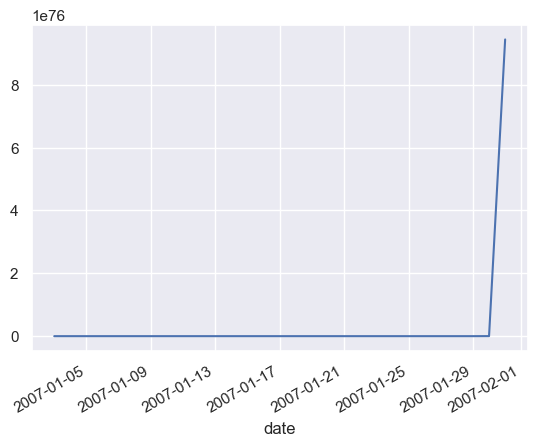

In [22]:
# ax = drrpw.plot(x='date', y='Wealth', legend=False)
# rp.plot(x='date', y='Wealth', ax=ax, legend=False)
rp.plot(x='date', y='Wealth', legend=False)
# ax.legend('DRRPW', 'Nominal RP')
plt.savefig('test.png')

In [27]:
portVal2 = portVal
portVal2['date'] = pd.to_datetime(portVal2['date'])
portVal2 = portVal2.merge(returns[['date','RF']], how='left', on='date')
portVal2['RF'] = portVal2['RF']/365 # Annual risk free rate
portVal2['ret'] = portVal2['Wealth'].pct_change()
portVal2['ExcessRet'] = portVal2['ret'] - portVal2['RF']
SR = portVal2['ExcessRet'].mean()/portVal2['ExcessRet'].std()


-0.3133906609289943

In [ ]:
def calculateSharpe(portVal):
    portVal['RF'] = portVal['RF']/365 # Annual risk free rate
    portVal['ret'] = portVal['Wealth'].pct_change()
    portVal['ExcessRet'] = portVal['ret'] - portVal['RF']
    SR = portVal['ExcessRet'].mean()/portVal['ExcessRet'].std()

    return SR


def plotWealth(holdings):
    print(holdings.head())

def plotHoldings(holdings):
    pass


In [ ]:
TODO:
1. Write Risk Parity solver in CVXOPT
2. Write the new Dist. Robust RP in CVXOPT
3. Figure out how to use cvxpylayers
4. Make wealth, SR and holdings graphs code

C:\Users\Rafay\AppData\Local\Temp\ipykernel_19260\3636925383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  [x for x in list(round(holdings.sum(axis=1),3)) if x!=1.0]


[]

In [ ]:
from enum import Enum
class Optimizers(Enum):
    MVO = 1
    RP = 2

In [ ]:
Optimizers.MVO

<Optimizers.MVO: 1>